Importar librerías

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

Obtener data

In [36]:
# Generar datos de ejemplo
X, _ = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 23)

# Escalar los datos
X = StandardScaler().fit_transform(X)

Escoger el mejor eps a través de las distancias de un punto a su vecino más cercano, con el quiebre escogemos el eps y con la cantidad de vecinos escogemos el min_samples

In [52]:
# crear un diccionario para guardar la cantidad de vecinos y las distancias
neighbors_dict = dict()
# realizar las iteraciones
for n_neighbors in range(2, 10):
    neigh = NearestNeighbors(n_neighbors = n_neighbors)
    neigh.fit(X)

    # las distancias vendrian a hacer de dos columnas, la primera representa la distancia
    # del punto sobre si mismo y las restantes representan la distancias a sus vecinos más cercanos
    distances, indices = neigh.kneighbors(X)
    [0, 2,
     0, 5,
     0, 4]
    # se queda con la máxima distancia, o sea al vecino más lejano para obtener con cual se pude cubrir
    # los n vecinos
    max_distances = np.max(distances[:, 1:], axis = 1)

    # ordenar distancias
    max_distances = np.sort(max_distances, axis = 0)

    # guardar distancias en el diccionario
    neighbors_dict[n_neighbors] = max_distances

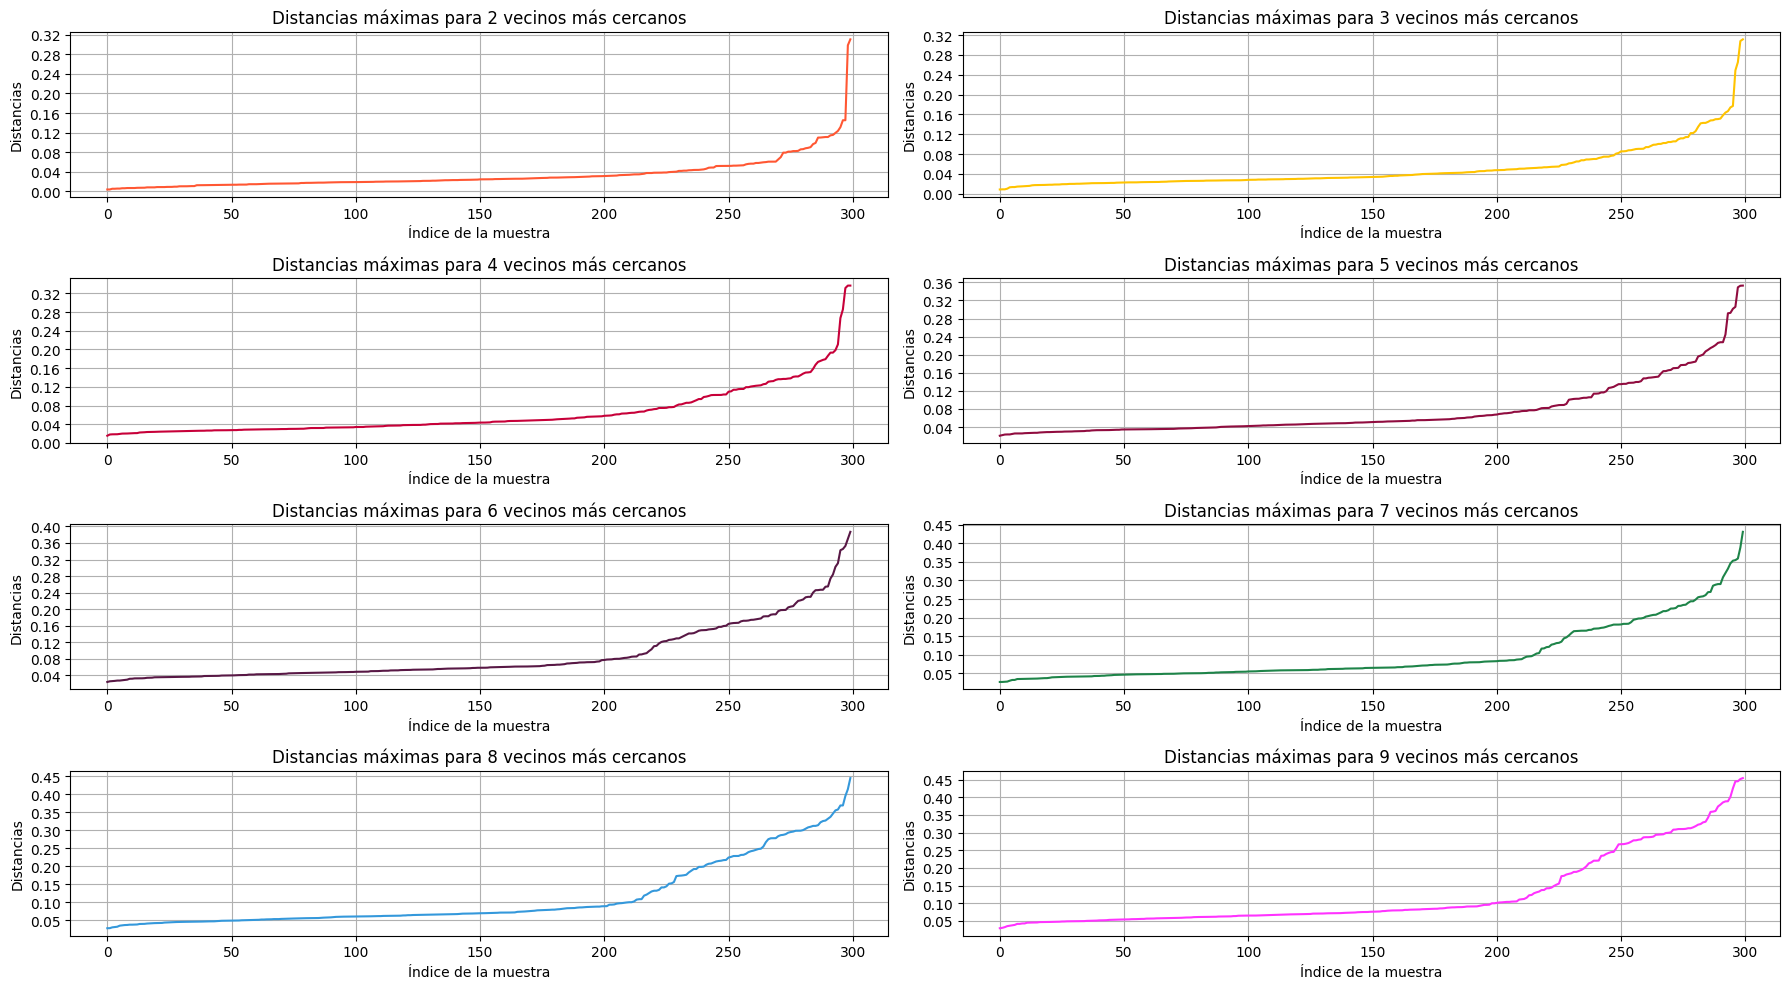

In [92]:
fig, axis = plt.subplots(4, 2, figsize = (18, 10))
colors = ["#FF5733", "#FFC300", "#C70039", "#900C3F", "#581845", "#1E8449", "#3498DB",
            "#FF33FF", "#33FFCC", "#FF6666", "#99CC99", "#3399FF", "#FF9933", "#CC33FF", "#66CCCC"]
plots_dict = dict(enumerate(range(2, 10)))
for position, n_neighbors in plots_dict.items():
    row = position // 2
    col = position % 2
    ax = axis[row, col]
    distances = neighbors_dict[n_neighbors]
    ax.plot(distances, linestyle = '-', color = colors[position])
    ax.set_xlabel('Índice de la muestra')
    ax.set_ylabel('Distancias')
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=10))
    ax.set_title(f'Distancias máximas para {n_neighbors} vecinos más cercanos')
    ax.grid()
plt.tight_layout()
plt.show()

Para cada plot se obtienen los siguientes resultados por inspección visual (haciendo equivalencias de eps = distancia en quibre y n_min_samples = n_neighbors):

* eps = 0.08, n_min_samples = 2
* eps = 0.12, n_min_samples = 3
* eps = 0.16, n_min_samples = 4
* eps = 0.16, n_min_samples = 5
* eps = 0.12, n_min_samples = 6
* eps = 0.15, n_min_samples = 7
* eps = 0.10, n_min_samples = 8
* eps = 0.15, n_min_samples = 9

Se entrena cada pair y se plotea viendo los plots (usar alguna metrica para evaluar no solo por inspección visual)

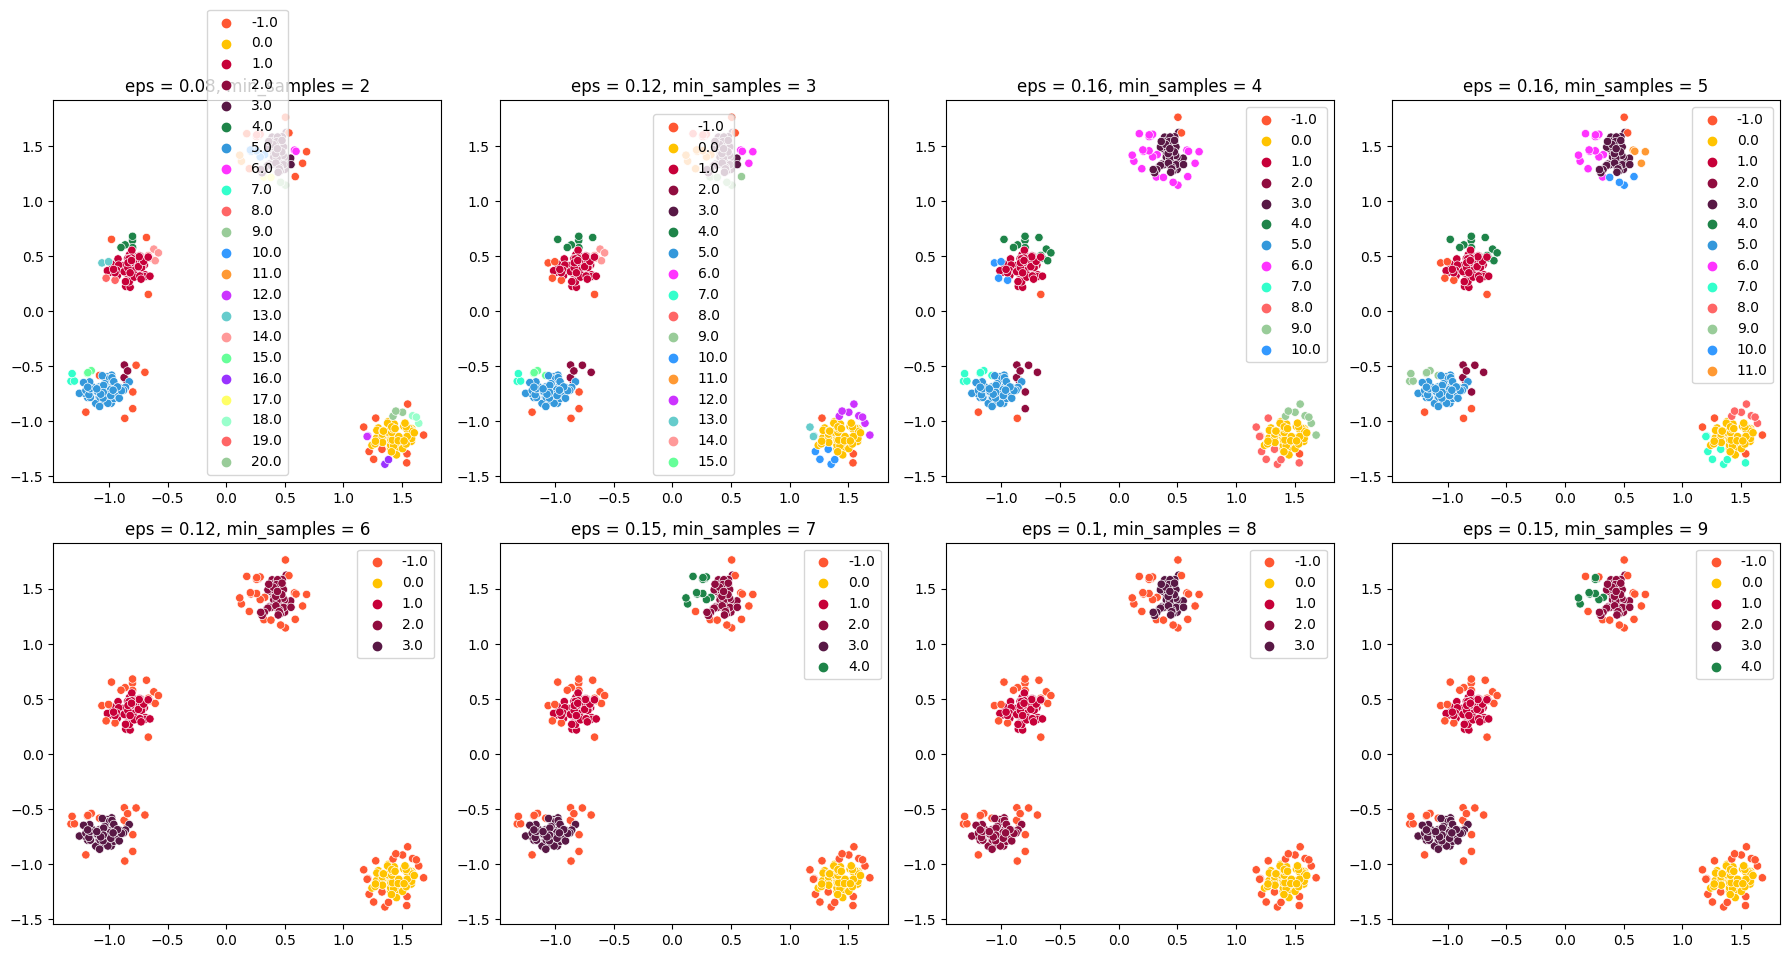

In [122]:
# declarar parametros de dbscan (eps, n_min_samples)
dbscan_params = [(0.08, 2), (0.12, 3),
                 (0.16, 4), (0.16, 5),
                 (0.12, 6), (0.15, 7),
                 (0.10, 8), (0.15, 9)]

plot_order = list(range(9))

colors = ["#FF5733", "#FFC300", "#C70039", "#900C3F", "#581845", "#1E8449", "#3498DB",
          "#FF33FF", "#33FFCC", "#FF6666", "#99CC99", "#3399FF", "#FF9933", "#CC33FF", "#66CCCC",
          "#FF9999", "#66FF99", "#9933FF", "#FFFF66", "#99FFCC", "#FF6666", "#99CC99", "#FF9933",
          "#CC33FF", "#66CCCC", "#FF5733", "#FFC300", "#C70039", "#900C3F", "#581845"]


fig, axis = plt.subplots(2, 4, figsize = (18, 10))
for (eps, n_min_samples), order in zip(dbscan_params, plot_order):
    dbscan = DBSCAN(eps = eps, min_samples = n_min_samples)
    labels = dbscan.fit_predict(X)
    n_labels = len(np.unique(labels))
    X_plot = np.c_[X, labels]
    # Visualizar los resultados
    row = order // 4
    col = order % 4
    ax = axis[row, col]
    sns.scatterplot(x = X_plot[:, 0], y = X_plot[:, 1], hue = X_plot[:, -1], palette = colors[:n_labels], ax = ax)
    ax.set_title(f'eps = {eps}, min_samples = {n_min_samples}')
plt.tight_layout()
plt.show()
